[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dhshah1112/CMPE258/blob/main/Assignment5/CMPE258_Assignment5_B.ipynb)


In [9]:
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from torch.autograd import Variable

In [10]:
# Seed for reproducibility
np.random.seed(0)
torch.manual_seed(0)

# Generate inputs (reduced dataset size for memory efficiency)
N = 1000  # Total number of data points
x1 = np.random.uniform(-3, 3, N)
x2 = np.random.uniform(-3, 3, N)
x3 = np.random.uniform(-3, 3, N)

# Calculate outputs using the non-linear equation
y = np.sin(x1) + x2**2 - np.log(1 + np.exp(-x3)) + np.random.normal(scale=0.1, size=N)

# Convert to PyTorch tensors
inputs = torch.Tensor(np.stack([x1, x2, x3], axis=1))
outputs = torch.Tensor(y[:, None])  # Ensuring correct shape for outputs

# Convert to Variables for PyTorch
inputs, outputs = Variable(inputs), Variable(outputs)


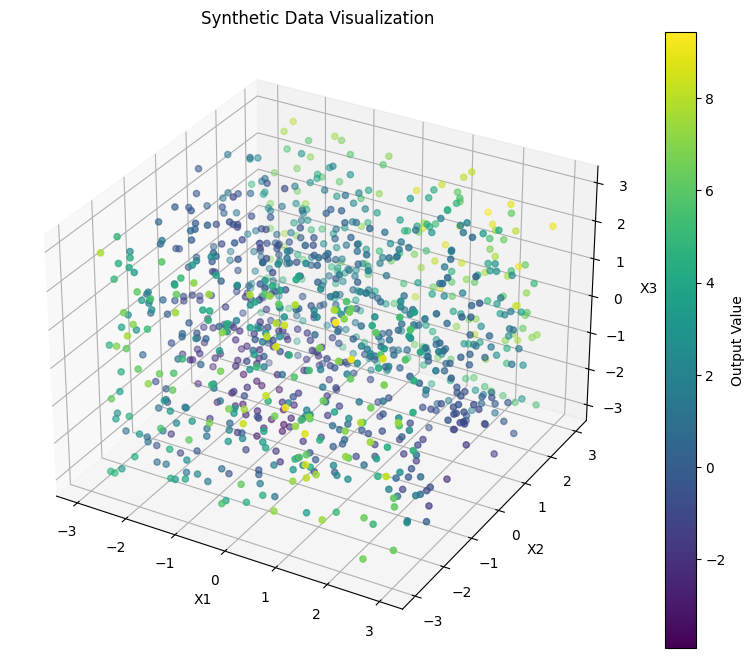

In [15]:
# Assuming 'inputs' and 'outputs' are the synthetic data you have generated
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Extract the input values for plotting
x1_plot = inputs[:, 0].detach().numpy()
x2_plot = inputs[:, 1].detach().numpy()
x3_plot = inputs[:, 2].detach().numpy()

# Extract the output values for color coding
y_plot = outputs.detach().numpy().flatten()

# Create a 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Use color coding for the fourth dimension (output)
sc = ax.scatter(x1_plot, x2_plot, x3_plot, c=y_plot, cmap=plt.get_cmap('viridis'))

# Add color bar which maps values to colors
cb = plt.colorbar(sc, ax=ax)
cb.set_label('Output Value')

# Set labels for axes
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('X3')

# Show plot
plt.title('Synthetic Data Visualization')
plt.show()


In [11]:
class ThreeLayerNN(torch.nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(ThreeLayerNN, self).__init__()
        # Initialize weights and biases as Parameters
        self.W1 = torch.nn.Parameter(torch.randn(input_size, hidden_size1))
        self.b1 = torch.nn.Parameter(torch.randn(1, hidden_size1))
        self.W2 = torch.nn.Parameter(torch.randn(hidden_size1, hidden_size2))
        self.b2 = torch.nn.Parameter(torch.randn(1, hidden_size2))
        self.W3 = torch.nn.Parameter(torch.randn(hidden_size2, output_size))
        self.b3 = torch.nn.Parameter(torch.randn(1, output_size))

    def forward(self, x):
        # First layer
        z1 = torch.einsum('ij,jk->ik', x, self.W1) + self.b1
        a1 = F.relu(z1)
        # Second layer
        z2 = torch.einsum('ij,jk->ik', a1, self.W2) + self.b2
        a2 = F.relu(z2)
        # Output layer
        z3 = torch.einsum('ij,jk->ik', a2, self.W3) + self.b3
        y_pred = z3  # No activation for the last layer, assuming a regression problem
        return y_pred


In [12]:
# Hyperparameters
input_size = 3
hidden_size1 = 64
hidden_size2 = 64
output_size = 1
learning_rate = 0.001
epochs = 1000

# Model, Loss and Optimizer
model = ThreeLayerNN(input_size, hidden_size1, hidden_size2, output_size)
criterion = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Training loop
losses = []
for epoch in range(epochs):
    # Forward pass
    y_pred = model(inputs)
    loss = criterion(y_pred, outputs)
    losses.append(loss.item())

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f'Epoch {epoch+1}/{epochs}, Loss: {loss.item()}')


Epoch 1/1000, Loss: 18732.2265625
Epoch 101/1000, Loss: 310.6148681640625
Epoch 201/1000, Loss: 126.5205307006836
Epoch 301/1000, Loss: 83.40562438964844
Epoch 401/1000, Loss: 61.14335632324219
Epoch 501/1000, Loss: 43.78240966796875
Epoch 601/1000, Loss: 31.074235916137695
Epoch 701/1000, Loss: 20.908559799194336
Epoch 801/1000, Loss: 16.390987396240234
Epoch 901/1000, Loss: 13.452526092529297


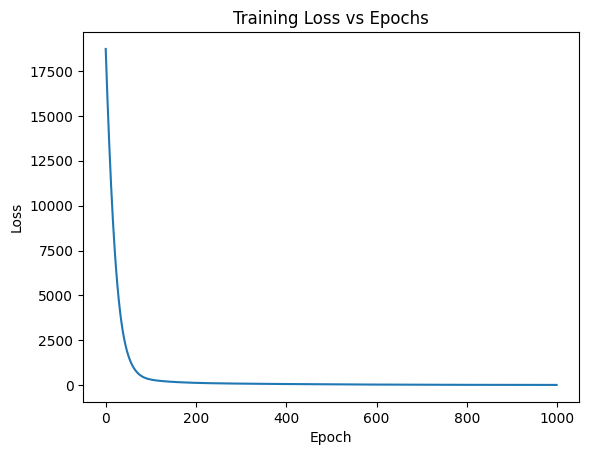

In [13]:
plt.plot(losses)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss vs Epochs')
plt.show()
